# Aygaz Veri Analizi Bootcamp'i Bitirme Projesi

Merhaba. Ben Leyla. İTÜ Matematik Mühendisliği 4. sınıf öğrencisiyim. Veri analizi alanında kendimi geliştirmek istediğim için bu bootcampe katıldım. Bootcampten mezun olurken projemi elimden geldiğince detaylandırmaya çalıştım. Bu projeyle birlikte derslerde öğrenmiş olduğumuz konuların üzerinden geçmiş oldum. Çeşitli grafiklerin çizimlerini, kullanmayı öğrenemediğim fonksiyonları öğrendim. Emeği geçen tüm Global AI Hub mentorlerine çok teşekkür ederim.

Projeme kullanacağım kütüphaneleri eklemekle başladım. Veri analizinde vazgeçilmez olan veri görselleştirme için **matplotlib**, **seaborn** ve **tabulate** kütüphanelerini kullandım. Verilerin okunabilir hale gelmesi, temizlenmesi için ise **numpy** ve **pandas** kütüphanelerini kullandım. 

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from urllib.request import urlopen
import urllib
from PIL import Image


Veri setimi online olarak jupyter notebook'a aktaramadığım için indirip localden okumayı tercih ettim. Aynı yöntemi New York City haritası için de kullandım. Veri setimi ve haritayı [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/code?datasetId=268833&sortBy=voteCount)'dan aldım.

Daha sonra bu veri setinde bulunan sütun isimlerini araştırdım. Bu sütunlarda tutulan verilerin çeşitlerini buldum ve aralarında kaç tane sayı olmayan veri olduğunu hesapladım.

In [2]:
airbnb_df = pd.read_csv('airbnb_ny_2019.csv')
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
airbnb_df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# describe fonksiyonu ile veri setinin geneli hakkında bilgi edindik.

airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Buradan itibaren veri setimizde bulunan sütunlarla ilgili çalışmalar yapmaya başladım.

İlk olarak *neighbourhood_group* sütununu kullanarak veri setinde geçen yerleri buldum. Daha sonra ayrıntılı olarak hangi mahallelerin veri setinde olduğunu *neighbourhood* sütunuyla inceledim.

Burada bir de airbnb ile kiralanan mekanların oda tiplerini inceledim.

*neighbourhood_group* içinde her bir yer veri seti içinde kaç defa geçmiş ilk olarak onu saydırıp basit bir tablo ile gösterdim. Daha sonra bu tabloyu *pie chart* olarak çizdim. En son olarak elimdeki yerlerin en fazla ve en az ne kadara kiraya verildiğini hesapladım.

Veri setinde bulunan mahallelerin sayısı unique olarak 221 olduğu için ve bunların veri setinde ne kadar geçtiğini görebilmek amacıyla *histogram* oluşturdum. Daha sonra en çok tekrarlanan 10 mahalleyi **counterplot** kullanarak çizdim.

In [7]:
nbhgs = airbnb_df["neighbourhood_group"].unique()
nbhg_counts = airbnb_df["neighbourhood_group"].value_counts()

In [8]:
print(tabulate(pd.DataFrame(nbhg_counts), headers = 'keys', tablefmt = 'pretty'))

+---------------------+-------+
| neighbourhood_group | count |
+---------------------+-------+
|      Manhattan      | 21661 |
|      Brooklyn       | 20104 |
|       Queens        | 5666  |
|        Bronx        | 1091  |
|    Staten Island    |  373  |
+---------------------+-------+


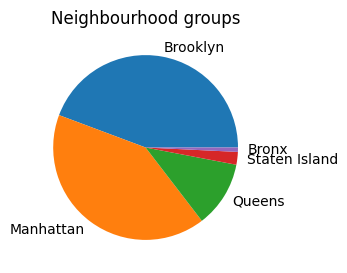

In [9]:
plt.figure(figsize=(3,3))
plt.pie(nbhg_counts, labels = nbhgs)
plt.title("Neighbourhood groups")
plt.show()

In [10]:
mins = []
for i in nbhgs:
    mins.append(airbnb_df[airbnb_df['neighbourhood_group']==i]['price'].min())
maks = []
for i in nbhgs:
    maks.append(airbnb_df[airbnb_df['neighbourhood_group']==i]['price'].max())
    
maksmin_df = pd.DataFrame([mins, maks], columns=nbhgs, index=['Min Price', 'Max Price'])
maksmin_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Min Price,0,0,10,13,0
Max Price,10000,10000,10000,5000,2500


In [11]:
nbhs = airbnb_df["neighbourhood"].unique()
nbh_counts = airbnb_df["neighbourhood"].value_counts()

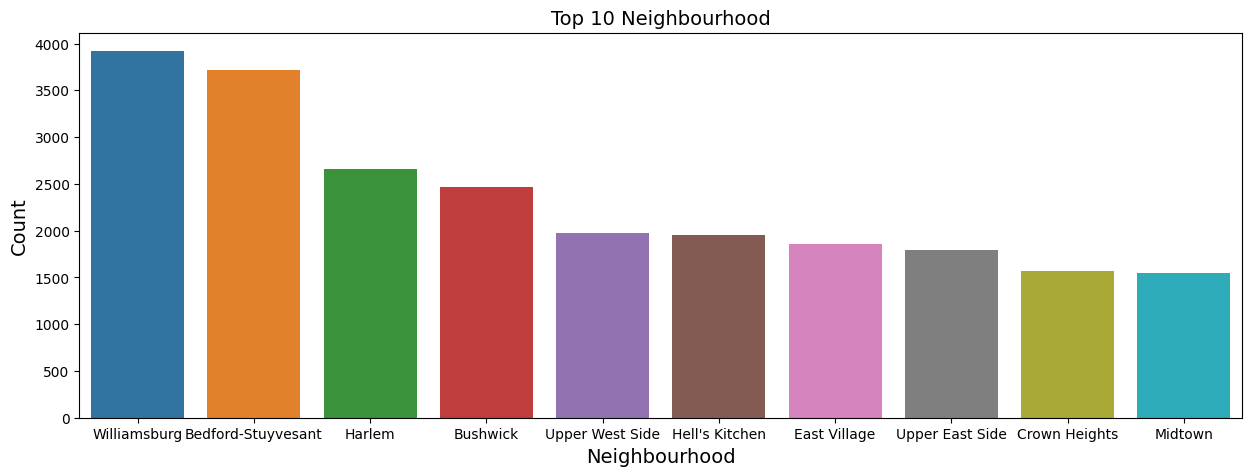

In [12]:
fig = plt.figure(figsize = (15, 5))
order = nbh_counts.iloc[:10].index
sns.countplot(data=airbnb_df, x='neighbourhood',order=order)

plt.xlabel("Neighbourhood", size = 14)
plt.ylabel("Count", size = 14)
plt.title('Top 10 Neighbourhood', fontsize = 14);

Text(0.5, 0, 'Neighbourhood counts')

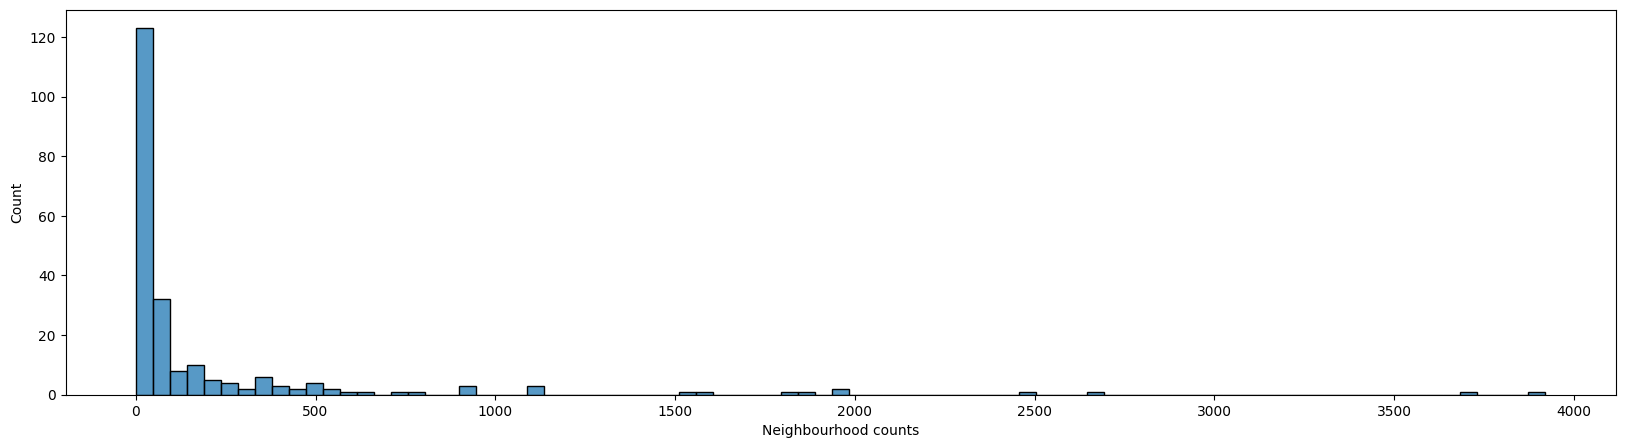

In [13]:
plt.figure(figsize=(20,5))
sns.histplot(nbh_counts)
plt.xlabel('Neighbourhood counts')

Veri setimize baktığımızda *room_type* isimli bir sütun bulunmakta. Bu sütunda üç tane eşsiz oda tipi var. Bu odalar nelerdir ve her birinden ne kadar bulunmakta bunu saydırdım ve bir *tablo* ve *pie chart* oluşturdum.

In [14]:
roomt = airbnb_df["room_type"].unique()
roomt_counts = airbnb_df["room_type"].value_counts()

In [15]:
print(tabulate(pd.DataFrame(roomt_counts), headers = 'keys', tablefmt = 'pretty'))

+-----------------+-------+
|    room_type    | count |
+-----------------+-------+
| Entire home/apt | 25409 |
|  Private room   | 22326 |
|   Shared room   | 1160  |
+-----------------+-------+


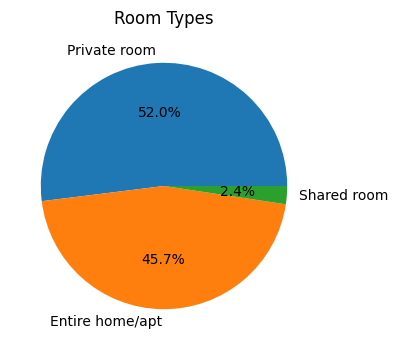

In [16]:
plt.figure(figsize=(4,4))
plt.pie(roomt_counts, labels = roomt, autopct="%.1f%%")
plt.title("Room Types")
plt.show()

Veri setimizde oldukça fazla *host* bulunmakta. Bunu aşağıda gösteriyorum. *Host*ların çoğu bir adet kiralama yapmıştır.

Bunlara ilaven en fazla kiralama yapan hostun sayısını aşağıda bulabiliriz. Daha sonra top 10 hostun kiralama verisini bir *dataframe*de tuttum ve bunu *barplot* kullanarak görselleştirdim.

In [17]:
print(len(airbnb_df.host_id.unique()))

37457


In [18]:
aa = pd.DataFrame(airbnb_df.host_id.value_counts() == 1)
aa.iloc[:,0].value_counts()

count
True     32303
False     5154
Name: count, dtype: int64

In [19]:
top_host = airbnb_df.host_id.value_counts().head(10)

top_host_check = airbnb_df.calculated_host_listings_count.max()
print('The most booked host has',top_host_check,'book.')

The most booked host has 327 book.


In [20]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'host_id':'Host_ID', 'count':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


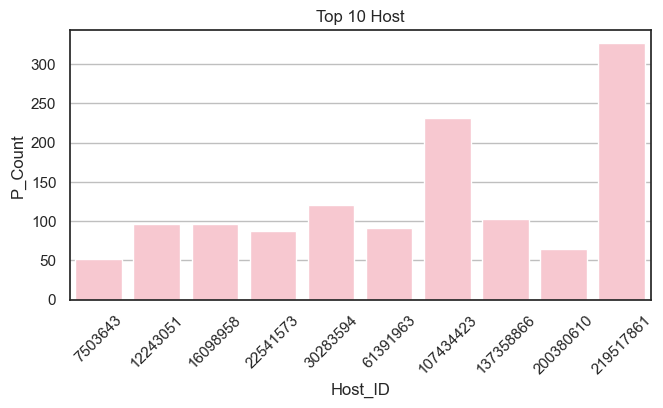

In [22]:
sns.barplot(x="Host_ID", y="P_Count", data= top_host_df, color="pink").set_title("Top 10 Host")
plt.xticks(rotation=45)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.grid(color='gray', linewidth=1, axis='y', alpha=0.5)
plt.show()

Burada ise kiralanan yerlerin *longitude* ve *latitude* verilerini kullanarak tam yerlerini gösterdik. 365 gün boyunca kiralanabilen yerleri ise işaretledik ve bu işaretlenen yerlerin kiralama ücretlerini renkleri ile belirledik. Görüldüğü üzere kiralanan yerlerin çok büyük bir kısmı 200 doların altında kiralanmakta. En başta bir filtre kullandık verilerin boyutunu azaltmak için. 

Biraz altında ise Kaggle'dan veri seti ile birlikte elde ettiğimiz New York City fotoğrafı ile birlikte bu *scatter plot*u yeniden oluşturdum.

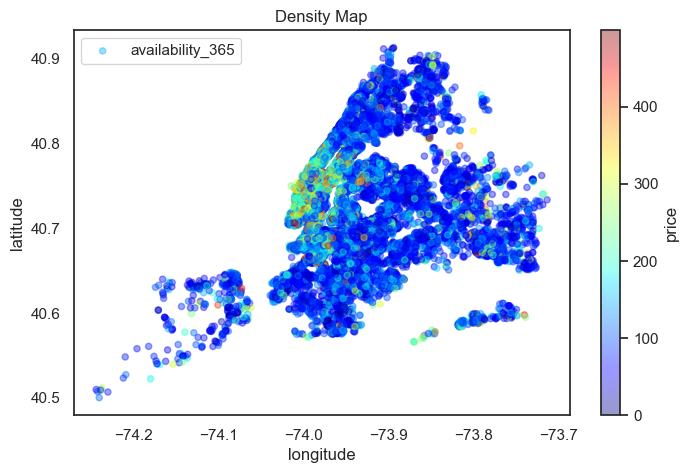

In [23]:
lessth500 = airbnb_df[airbnb_df.price < 500]
scplot = lessth500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(8,5));
plt.title('Density Map');

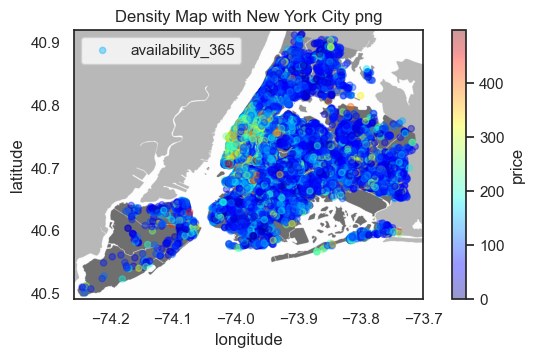

In [25]:
im = Image.open("New_York_City.png")

plt.imshow(im,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

lessth500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5);
plt.title('Density Map with New York City png');

###### En çok yorum yapılan ilan ve en az yorum yapılan ilanlar:

In [26]:
airbnb_df.loc[airbnb_df['number_of_reviews'].max()]

id                                                                       237210
name                              Manhattan Loft in Prime East Village Location
host_id                                                                 1243192
host_name                                                            Jacqueline
neighbourhood_group                                                   Manhattan
neighbourhood                                                 Greenwich Village
latitude                                                               40.73268
longitude                                                             -73.99255
room_type                                                       Entire home/apt
price                                                                       241
minimum_nights                                                               30
number_of_reviews                                                             0
last_review                             

In [27]:
airbnb_df.loc[airbnb_df['number_of_reviews'].min()]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

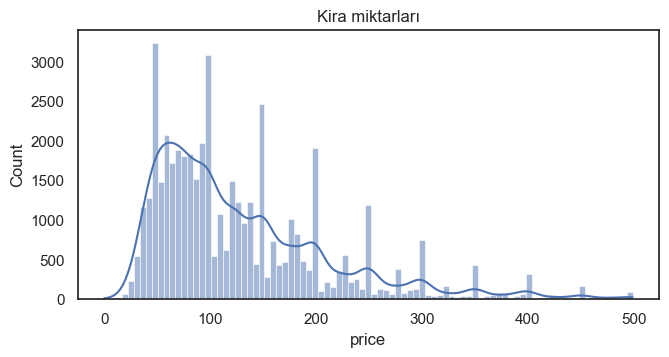

In [28]:
prices = airbnb_df[airbnb_df.price < 500]["price"]
sns.histplot(prices, kde=True);
plt.title("Kira miktarları");

### References
1. [Kaggle Dataset](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/code?datasetId=268833&sortBy=voteCount)
2. [Density Maps](https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb)
3. [Pandas Lib Doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
4. [Seaborn Lib Doc](https://seaborn.pydata.org/generated/seaborn.countplot.html)

Sorularımı cevaplayan mentorlerime çok teşekkür ederim.